In [1]:
import pandas as pd
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from collections import defaultdict
import matplotlib
from matplotlib import rc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans,vq
from numpy import vstack,array
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from pylab import rcParams
import numpy as np


In [2]:
data = pd.read_csv("EdStatsData.csv", ",")
all_unique_indicators = data["Indicator Name"].unique()
pisa = pd.read_csv("clean_PISA.csv")
rows_with_highest_ed= []
for row in all_unique_indicators: 
    if "Wittgenstein Projection" in row and "highest" in row and "Total" in row and "Percentage" in row:
        rows_with_highest_ed.append(row)
rows_with_highest_ed_attained = data[data["Indicator Name"].isin(rows_with_highest_ed)]
filtered_data_frame = pd.DataFrame({'Country Name': rows_with_highest_ed_attained["Country Name"], 'Country Code': rows_with_highest_ed_attained["Country Code"], 
                         '2010': rows_with_highest_ed_attained["2010"],  
                                    '2015': rows_with_highest_ed_attained["2015"],
                                    '2020': rows_with_highest_ed_attained["2020"],
                                    '2030': rows_with_highest_ed_attained["2030"],
                                    '2040': rows_with_highest_ed_attained["2040"],
                                    '2050': rows_with_highest_ed_attained["2050"],
                                    '2060': rows_with_highest_ed_attained["2060"],
                                    '2070': rows_with_highest_ed_attained["2070"],
                                    '2080': rows_with_highest_ed_attained["2080"],
                                    '2090': rows_with_highest_ed_attained["2090"],
                                    '2100': rows_with_highest_ed_attained["2100"],
                                    'Indicator Name': rows_with_highest_ed_attained["Indicator Name"], 
                         'Indicator Code': rows_with_highest_ed_attained["Indicator Code"]})
all_countries = filtered_data_frame["Country Name"].unique()
filtered_data_frame = filtered_data_frame[filtered_data_frame["Country Name"].isin(pisa["Country Name"])]

In [3]:
cols =rows_with_highest_ed.append("Country Name")

dataframes = []

for indicator in rows_with_highest_ed: 
    vals = filtered_data_frame[filtered_data_frame["Indicator Name"] == indicator]
    dataframes.append(vals)
dataframes[0].head()

,2010,2015,2020,2030,2040,2050,2060,2070,2080,2090,2100,Country Code,Country Name,Indicator Code,Indicator Name
120669,0.10,0.09,0.07,0.05,0.03,0.02,0.01,0.01,0.01,0.00,0.0,ARG,Argentina,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
131664,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,AUS,Australia,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
135329,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,AUT,Austria,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
160984,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,BEL,Belgium,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...
190304,0.14,0.13,0.11,0.09,0.06,0.05,0.03,0.02,0.01,0.01,0.0,BRA,Brazil,PRJ.ATT.15UP.S1.MF,Wittgenstein Projection: Percentage of the pop...


In [4]:
filtered_data_frame.to_csv("Highest level of educational attainment1.csv")

In [5]:
d2010 = defaultdict(float)
d2015 = defaultdict(float)
d2020 = defaultdict(float)
d2030 = defaultdict(float)
d2040 = defaultdict(float)
d2050 = defaultdict(float)
d2060 = defaultdict(float)
d2070 = defaultdict(float)
d2080 = defaultdict(float)
d2090 = defaultdict(float)
d2100 = defaultdict(float)
first = dataframes[0]
first = first.reset_index()

d2010["Country Name"] = first["Country Name"]

i = 0

for frame in dataframes: 
    i += 1
    if i != 67: 
        frame = frame.reset_index()
        d2010[frame["Indicator Name"].unique()[0] + " 2010"] = frame["2010"]
        d2015[frame["Indicator Name"].unique()[0] + " 2015"] = frame["2015"]
        d2020[frame["Indicator Name"].unique()[0] + " 2020"] = frame["2020"]
        d2030[frame["Indicator Name"].unique()[0] + " 2030"] = frame["2030"]
        d2040[frame["Indicator Name"].unique()[0] + " 2040"] = frame["2040"]
        d2050[frame["Indicator Name"].unique()[0] + " 2050"] = frame["2050"]
        d2060[frame["Indicator Name"].unique()[0] + " 2060"] = frame["2060"]
        d2070[frame["Indicator Name"].unique()[0] + " 2070"] = frame["2070"]
        d2080[frame["Indicator Name"].unique()[0] + " 2080"] = frame["2080"]
        d2090[frame["Indicator Name"].unique()[0] + " 2090"] = frame["2090"]
        d2100[frame["Indicator Name"].unique()[0] + " 2100"] = frame["2100"]

In [6]:
df2010 = pd.DataFrame.from_dict(d2010, 'columns')
df2015 = pd.DataFrame.from_dict(d2015, 'columns')
df2020 = pd.DataFrame.from_dict(d2020, 'columns')
df2030 = pd.DataFrame.from_dict(d2030, 'columns')
df2040 = pd.DataFrame.from_dict(d2040, 'columns')
df2050 = pd.DataFrame.from_dict(d2050, 'columns')
df2060 = pd.DataFrame.from_dict(d2060, 'columns')
df2070 = pd.DataFrame.from_dict(d2070, 'columns')
df2080 = pd.DataFrame.from_dict(d2080, 'columns')
df2090 = pd.DataFrame.from_dict(d2090, 'columns')
df2100 = pd.DataFrame.from_dict(d2100, 'columns')
frames = [df2010, df2015, df2020, df2030, df2040, df2050, df2060, df2070, df2080, df2090, df2100]
result = pd.concat(frames, axis=1)
result = result.fillna(0)

In [7]:
countries = result["Country Name"]
result = result.drop(["Country Name"], axis=1)
xstd = StandardScaler().fit_transform(result)
pca = PCA(n_components=5)
comp = pca.fit_transform(xstd)
pdf = pd.DataFrame( data=comp, columns=['comp1', 'comp2', 'comp3', 'comp4','comp5'])

[38, 51, 49, 31, 0, 37, 47, 4, 20, 8, 46, 48, 9, 18, 32, 40, 10, 41, 5, 45, 36, 42, 23, 39, 11, 13, 35, 7, 22, 43, 29, 30, 25, 33, 27, 2, 15, 12, 50, 14, 17, 16, 1, 34, 19, 3, 28, 44, 21, 6, 24, 26]


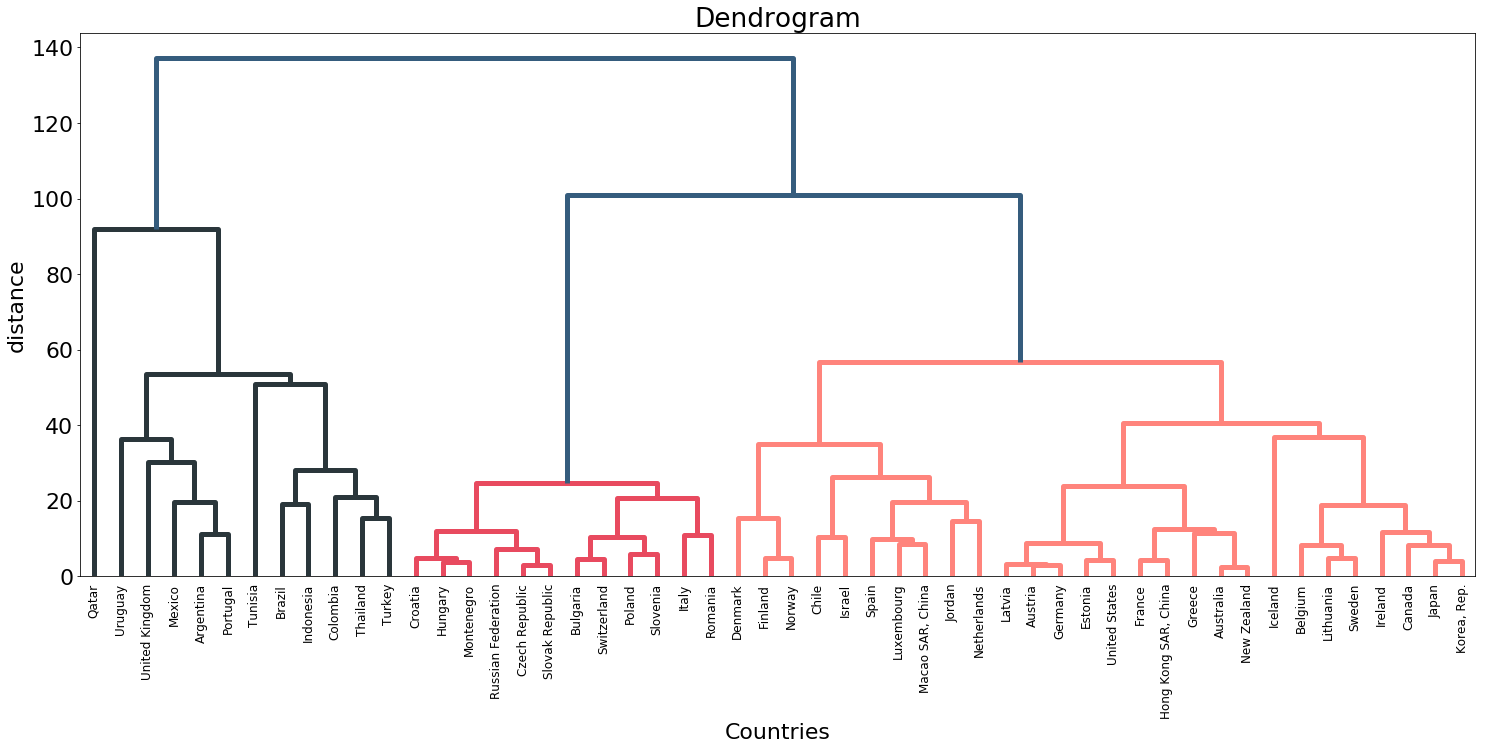

In [76]:
x = np.array(pdf)
Z = linkage(x,  method='ward')
c, coph_dists = cophenet(Z, pdist(x))
plt.figure(figsize=(25, 10))
plt.title('Dendrogram')
plt.xlabel('Countries')
plt.ylabel('distance')
hierarchy.set_link_color_palette(['#2a363b', '#e84a5f', '#ff847c', '#fecea8', '#99b898', '#355c7d'])
labels = countries
p = len(labels)
den = dendrogram(
    Z,
    p=p,
    no_plot=True,
    #labels = dictionary_2010["Country Name"],
    leaf_rotation=90.,  
    leaf_font_size=22., 
)
plt.rcParams['lines.linewidth'] = 5
print(den["leaves"])
temp = {den["leaves"][i]: labels[i] for i in range(len(den["leaves"]))}
def llf(xx):
    return "{}".format(countries[xx])
dendrogram(
            Z,  # show only the last p merged clusters
            p=p,  # show only the last p merged clusters
            leaf_label_func=llf,
            leaf_rotation=90.,
            leaf_font_size=12.,
            show_contracted=True,
            above_threshold_color='#355c7d'
            )
plt.savefig('dendrogram.png',bbox_inches = "tight")
plt.show()


Soome - geograafiliset 
Läti - geograafiliselt
Eesti - võrdlus
Korea - sarnane Eestiga (ja kauge)
Australia - https://en.wikipedia.org/wiki/Education_Index
Taani -  https://en.wikipedia.org/wiki/Education_Index

In [9]:
im_countries = ["Finland", "Latvia", "Estonia", "Korea, Rep.", "Australia", "Denmark"]
result["Country Name"] = countries
filt_f = result[result["Country Name"].isin(im_countries)]
filt_f.shape

(6, 727)

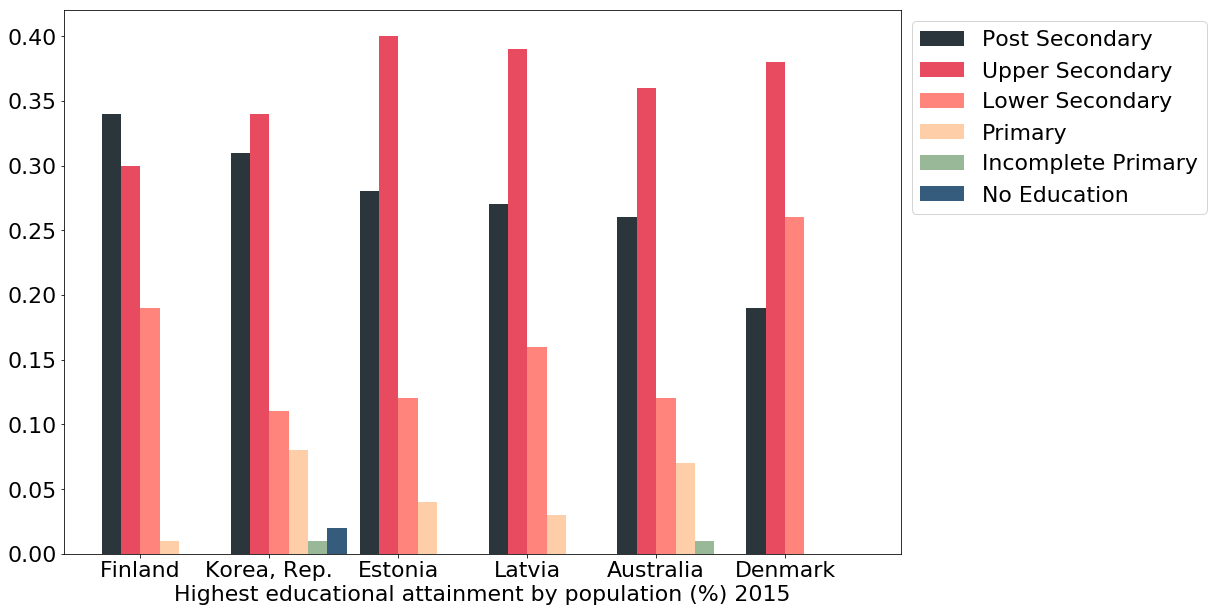

In [18]:


rcParams['figure.figsize'] = 15,10
matplotlib.rcParams.update({'font.size': 22})
w = .3
ind = np.array(range(0, 11, 2))
ax = plt.subplot(111)
filt_f = filt_f.sort_values(['Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015'], ascending = [0])
ax.bar(ind, filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015"], w,color=('#2a363b'), label="Post Secondary")
ax.bar(ind + w, filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2015"], w,color=('#e84a5f'), label="Upper Secondary")
ax.bar(ind + (w*2), filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2015"], w,color=( '#ff847c'), label="Lower Secondary")
ax.bar(ind  +(w*3), filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2015"], w,color=('#fecea8'), label="Primary")
ax.bar(ind + (w*4), filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2015"], w,color=('#99b898'), label="Incomplete Primary")
ax.bar(ind + (w*5), filt_f["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2015"], w,color=('#355c7d'), label="No Education")

ax.set_xticks(ind + (w * 1.5))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
ax.set_xticklabels(filt_f["Country Name"])
ax.set_xlabel('Highest educational attainment by population (%) 2015')
plt.savefig('Highesteducationalattainment.png',bbox_inches = "tight")
plt.show()

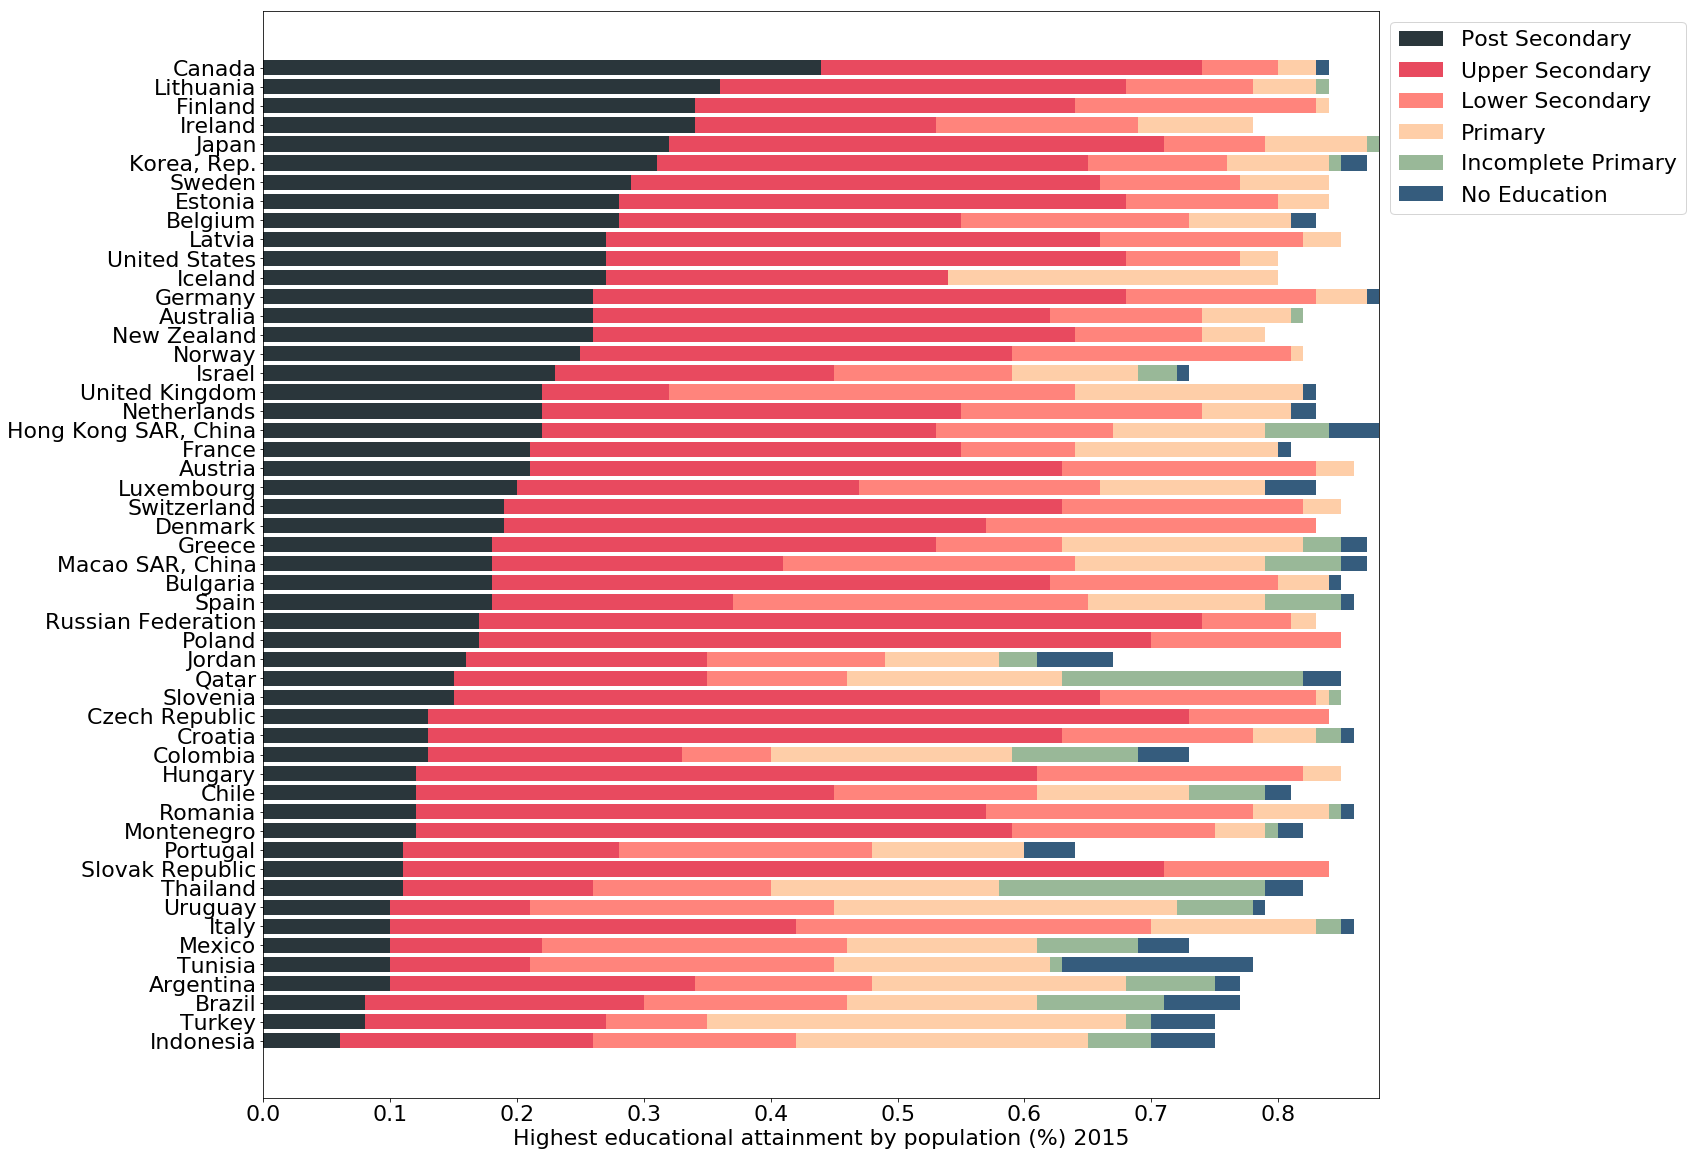

In [32]:

# '#2a363b', '#e84a5f', '#ff847c', '#fecea8', '#99b898', '#355c7d'
result = result.sort_values('Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015', axis=0)
names = result["Country Name"]
first = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total 2015"]
sec = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total 2015"]
third = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total 2015"]
fourth = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total 2015"]
fifth = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total 2015"]
sixth = result["Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total 2015"]
r = [i for i in range(52)]
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
matplotlib.rcParams.update({'font.size': 22})
patch_handles = []
left = np.zeros(len(names)) 
y_pos=np.arange(len(names))
left = np.zeros(len(names))

patch_handles.append(ax.barh(y_pos, first, color='#2a363b', align='center', left=left, label='Post Secondary'))
left+=first

patch_handles.append(ax.barh(y_pos, sec, color='#e84a5f', align='center', left=left, label='Upper Secondary'))
left+=sec

patch_handles.append(ax.barh(y_pos, third, color='#ff847c', align='center', left=left, label='Lower Secondary'))
left+=third

patch_handles.append(ax.barh(y_pos, fourth, color='#fecea8', align='center', left=left, label='Primary'))
left+=fourth

patch_handles.append(ax.barh(y_pos, fifth, color='#99b898', align='center', left=left, label='Incomplete Primary'))
left+=fifth

patch_handles.append(ax.barh(y_pos, sixth, color='#355c7d', align='center', left=left, label='No Education'))
left+=sixth


ax.set_yticks(y_pos)
ax.set_yticklabels(names)

#plt.xlabel("group")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
#plt.subplots_adjust(right=0.5)
plt.savefig('Highesteducationalattainmentstack.png',bbox_inches = "tight")
ax.set_xlabel('Highest educational attainment by population (%) 2015')
plt.show()

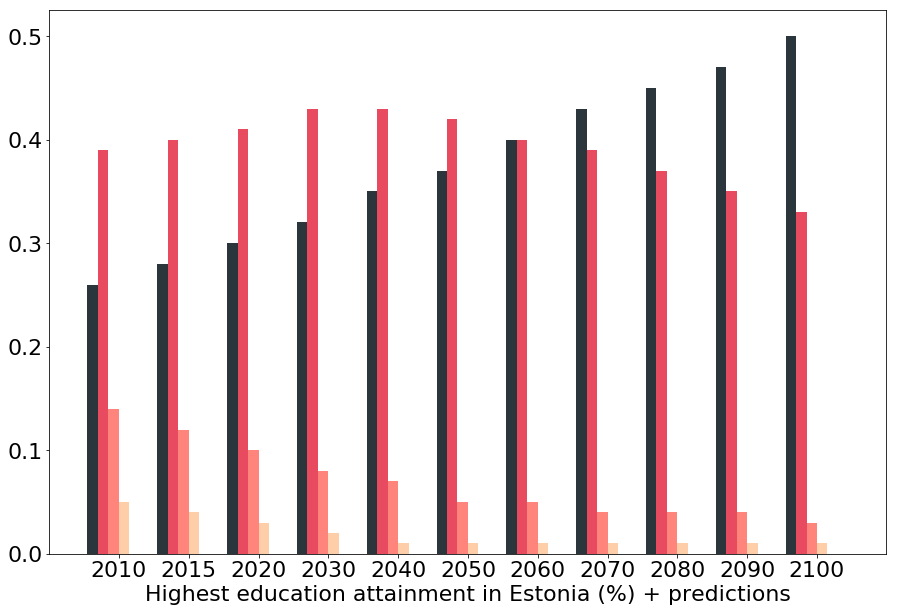

In [70]:
p = []
i = []
l =[]
n = []
pr = []
u = []
# '#2a363b', '#e84a5f', '#ff847c', '#fecea8', '#99b898', '#355c7d'
row = result[result["Country Name"]=="Estonia"]
postsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total "
incprim  = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Incomplete Primary. Total "
lsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Lower Secondary. Total "
noed = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. No Education. Total "
prim = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Primary. Total "
upsec = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Upper Secondary. Total "
years = ["2010", "2015", "2020", "2030", "2040", "2050", "2060", "2070", "2080", "2090", "2100"]
for year in years: 
    p.append(row[postsec + year].values[0])
    i.append(row[incprim + year].values[0])
    l.append(row[lsec + year].values[0])
    n.append(row[noed + year].values[0])
    pr.append(row[prim + year].values[0])
    u.append(row[upsec + year].values[0])
w = .3
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
matplotlib.rcParams.update({'font.size': 22})
ind = np.array(range(0, 21, 2))
ax.bar(ind, p, w,color=('#2a363b'), label="Post Secondary")
ax.bar(ind+w, u, w,color=('#e84a5f'), label="Upper Secondary")
ax.bar(ind + (w*2), l, w,color=( '#ff847c'), label="Lower Secondary")
ax.bar(ind  + (w*3), pr, w,color=('#fecea8'), label="Primary")
ax.bar(ind + (w*4),i , w,color=('#99b898'), label="Incomplete Primary")
ax.bar(ind + (w*5), n, w,color=('#355c7d'), label="No Education")
ax.set_xticks(ind + (w * 2.5))
#ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

ax.set_xticklabels(years)
ax.set_xlabel('Highest education attainment in Estonia (%) + predictions')
plt.savefig('esthigh.png',bbox_inches = "tight")
plt.show()    

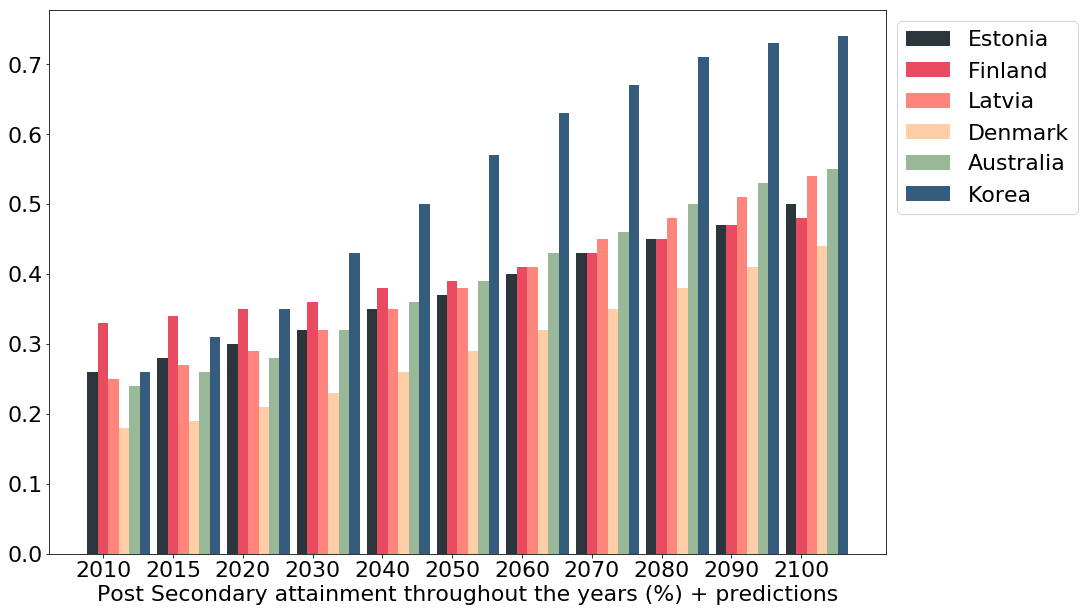

In [99]:
est = []
aust = []
latvia = []
den = []
korea = []
fin = []
# '#2a363b', '#e84a5f', '#ff847c', '#fecea8', '#99b898', '#355c7d'
est1 = result[result["Country Name"]=="Estonia"]
fin1 = result[result["Country Name"]=="Finland"]
latvia1 = result[result["Country Name"]=="Latvia"]
aust1 = result[result["Country Name"]=="Australia"]
den1 = result[result["Country Name"]=="Denmark"]
korea1 = result[result["Country Name"]=="Korea, Rep."]

v = "Wittgenstein Projection: Percentage of the total population by highest level of educational attainment. Post Secondary. Total "

years = ["2010", "2015", "2020", "2030", "2040", "2050", "2060", "2070", "2080", "2090", "2100"]
for year in years: 
    est.append(est1[v+year].values[0])
    aust.append(aust1[v+year].values[0])
    latvia.append(latvia1[v+year].values[0])
    den.append(den1[v+year].values[0])
    korea.append(korea1[v+year].values[0])
    fin.append(fin1[v+year].values[0])
w = .3
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
matplotlib.rcParams.update({'font.size': 22})
ind = np.array(range(0, 22, 2))
ax.bar(ind, est, w,color=('#2a363b'), label="Estonia")
ax.bar(ind+w, fin, w,color=('#e84a5f'), label="Finland")
ax.bar(ind + (w*2), latvia, w,color=( '#ff847c'), label="Latvia")
ax.bar(ind  + (w*3), den, w,color=('#fecea8'), label="Denmark")
ax.bar(ind + (w*4),aust , w,color=('#99b898'), label="Australia")
ax.bar(ind + (w*5), korea, w,color=('#355c7d'), label="Korea")
ax.set_xticks(ind + (w * 1))
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

ax.set_xticklabels(years)
ax.set_xlabel('Post Secondary attainment throughout the years (%) + predictions')
plt.savefig('postsec.png',bbox_inches = "tight")
plt.show()    